In [1]:
import numpy as np
import pandas as pd
import json
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
f = open(r'shipsnet.json')
dataset = json.load(f)
df = pd.DataFrame(dataset)
f.close()
print(dataset.keys())
df.head()

dict_keys(['data', 'labels', 'locations', 'scene_ids'])


,data,labels,locations,scene_ids
0,"[82, 89, 91, 87, 89, 87, 86, 86, 86, 86, 84, 8...",1,"[-118.2254694333423, 33.73803725920789]",20180708_180909_0f47
1,"[76, 75, 67, 62, 68, 72, 73, 73, 68, 69, 69, 6...",1,"[-122.33222866289329, 37.7491755586813]",20170705_180816_103e
2,"[125, 127, 129, 130, 126, 125, 129, 133, 132, ...",1,"[-118.14283073363218, 33.736016066914175]",20180712_211331_0f06
3,"[102, 99, 113, 106, 96, 102, 105, 105, 103, 10...",1,"[-122.34784341495181, 37.76648707436548]",20170609_180756_103a
4,"[78, 76, 74, 78, 79, 79, 79, 82, 86, 85, 83, 8...",1,"[-122.34852408322172, 37.75878462398653]",20170515_180653_1007


In [3]:
x = np.array(dataset['data']).astype('uint8')
y = np.array(dataset['labels']).astype('uint8')
x = x.reshape([-1, 3, 80, 80]).transpose([0,2,3,1])
print("Data Shape",x.shape)
print('Labels Shape',y.shape)

Data Shape (4000, 80, 80, 3)
Labels Shape (4000,)


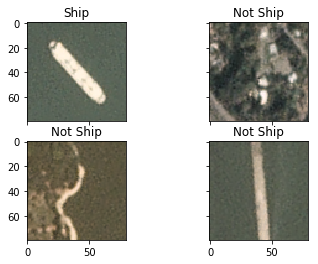

In [4]:
code = {1:'Ship', 0:'Not Ship'}

fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(x[0])
axs[0, 0].set_title(code[y[0]])
axs[0, 1].imshow(x[3500])
axs[0, 1].set_title(code[y[3500]])
axs[1, 0].imshow(x[3200])
axs[1, 0].set_title(code[y[3200]])
axs[1, 1].imshow(x[3100])
axs[1, 1].set_title(code[y[3100]])
for ax in axs.flat:
    ax.label_outer()

In [5]:
x = x.reshape([4000,19200])
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 ,random_state = 43)
#print(x_train.shape)
#print(y_train.shape)

In [6]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

In [7]:
accuracy = {}

In [9]:
#LogisticRegression
kfold = model_selection.KFold(n_splits=10, random_state=7)
accuracy_results = model_selection.cross_val_score(LogisticRegression(),x, y, cv=kfold, scoring='accuracy')
accuracy["LogisticRegression"] = accuracy_results.mean()
accuracy_results.mean()

0.895937

In [10]:
#SVC
kfold = model_selection.KFold(n_splits=10, random_state=7)
accuracy_results = model_selection.cross_val_score(SVC(),x, y, cv=kfold, scoring='accuracy')
accuracy["SVC"] = accuracy_results.mean()
accuracy_results.mean()

0.75125

In [11]:
#XGBClassifier
kfold = model_selection.KFold(n_splits=10, random_state=7)
accuracy_results = model_selection.cross_val_score(XGBClassifier(),x, y, cv=kfold, scoring='accuracy')
accuracy['XGB'] = accuracy_results.mean()
accuracy_results.mean()

0.957188

In [12]:
#RandomForestClassifier
kfold = model_selection.KFold(n_splits=10, random_state=7)
accuracy_results = model_selection.cross_val_score(RandomForestClassifier(),x, y, cv=kfold, scoring='accuracy')
accuracy['RandomForest'] = accuracy_results.mean()
accuracy_results.mean()

0.940312

In [13]:
#DecisionTreeClassifier
kfold = model_selection.KFold(n_splits=10, random_state=7)
accuracy_results = model_selection.cross_val_score(DecisionTreeClassifier(),x, y, cv=kfold, scoring='accuracy')
accuracy['DecisionTree'] = accuracy_results.mean()
accuracy_results.mean()

0.904062

In [14]:
#GaussianNB
kfold = model_selection.KFold(n_splits=10, random_state=7)
accuracy_results = model_selection.cross_val_score(GaussianNB(),x, y, cv=kfold, scoring='accuracy')
accuracy['GaussianNB'] = accuracy_results.mean()
accuracy_results.mean()

0.629062

In [15]:
#GradientBoostingClassifier()
kfold = model_selection.KFold(n_splits=10, random_state=7)
accuracy_results = model_selection.cross_val_score(GradientBoostingClassifier(),x, y, cv=kfold, scoring='accuracy')
accuracy['GradientBoost'] = accuracy_results.mean()
accuracy_results.mean()
print()

0.954375

In [16]:
#LinearSVC
kfold = model_selection.KFold(n_splits=10, random_state=7)
accuracy_results = model_selection.cross_val_score(LinearSVC(),x, y, cv=kfold, scoring='accuracy')
accuracy['LinearSVC'] = accuracy_results.mean()
accuracy_results.mean()

0.891562

In [17]:
#KNeighborsClassifier
kfold = model_selection.KFold(n_splits=10, random_state=7)
accuracy_results = model_selection.cross_val_score(KNeighborsClassifier(),x, y, cv=kfold, scoring='accuracy')
accuracy['KNeighbors'] = accuracy_results.mean()
accuracy_results.mean()

0.927187